In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import pickle
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from comparers import plot_decision_boundary, ModelComparer
import shap
from tasks.adult import make_task_modified_hours_per_week,\
                        make_task_modified_hours_per_week_and_country
shap.initjs()

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

# Tasks

## Modified Influential Feature

In [4]:
clf_a, clf_b, X, X_display, y, feature_names = make_task_modified_hours_per_week()

[08:53:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "nestimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:53:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:53:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "nestimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above c

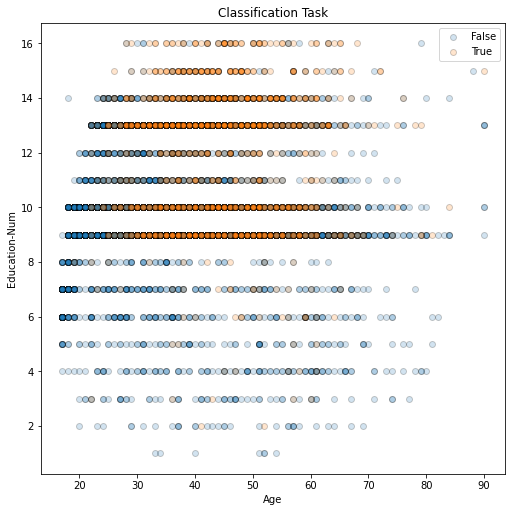

In [5]:
fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)
plot_decision_boundary(X, y, 'Classification Task', feature_names,
                       X_display=X_display, idx_x=0, idx_y=2, fig=fig, ax=ax, alpha=0.2)

In [6]:
y_pred = clf_a.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.95      0.92      4945
        True       0.80      0.62      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



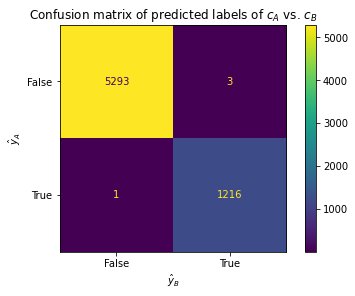

In [7]:
comparer = ModelComparer(clf_a, clf_b, feature_names)
comparer.plot_confusion_matrix(X)

In [8]:
y_pred = clf_a.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.95      0.92      4945
        True       0.80      0.62      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



In [9]:
y_pred = clf_b.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.95      0.92      4945
        True       0.80      0.62      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



## Modified Influential Feature and Non-Influential Feature

Hypthesis: A good explanation does not depend on small fluctuations in a feature that has no or small influence.
Evaluate: To what extent are the explanations different compared to the previous task?

In [9]:
clf_a, clf_b, X, X_display, y, feature_names = make_task_modified_hours_per_week_and_country()

[10:50:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "nestimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:50:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "nestimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above c

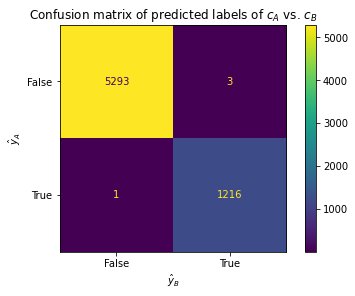

In [10]:
comparer = ModelComparer(clf_a, clf_b, feature_names)
comparer.plot_confusion_matrix(X)

In [11]:
y_pred = clf_a.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.95      0.92      4945
        True       0.80      0.62      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



In [12]:
y_pred = clf_b.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.95      0.92      4945
        True       0.80      0.62      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



# Explorative Analysis

In [7]:
explainer = shap.Explainer(lambda X: clf_a.predict_log_proba(X)[:, 1],
                           X, algorithm='exact', feature_names=feature_names)
explainer

In [7]:
%%time
shap_values = explainer(X)
with open('clf_a.shap.log_odds.expl', 'wb') as f:
    pickle.dump(shap_values, f, pickle.HIGHEST_PROTOCOL)

Exact explainer: 6514it [13:38,  7.90it/s]                          


CPU times: user 37min 58s, sys: 2min 1s, total: 40min
Wall time: 13min 38s


In [11]:
import pickle
with open('clf_a.shap.log_odds.expl', 'rb') as f:
    shap_values = pickle.load(f)

In [12]:
shap_values.display_data = X_display

Relationship and Age are of highest importance. The features Education-Num, Hours per week, Occupation, Sex, Capital Gain and Marital Status have a medium sized influence. Capital Loss, Workclass, Race and Country have low influence. Country is the feature of least importance to the classifier.

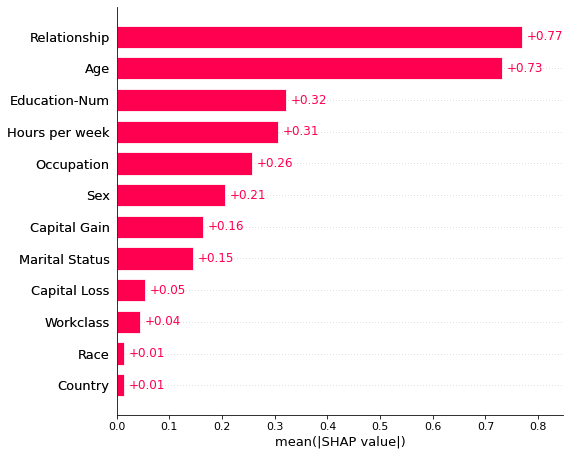

In [14]:
shap.plots.bar(shap_values, max_display=shap_values.shape[1])

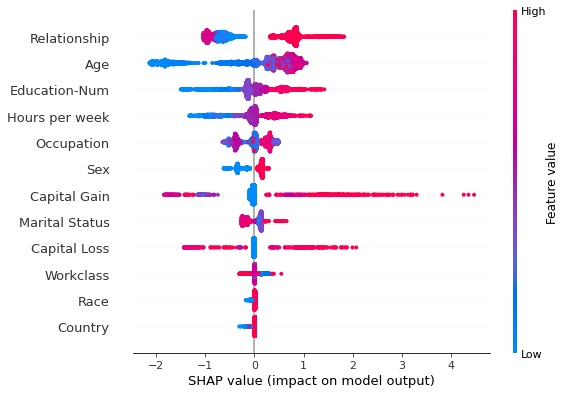

In [13]:
shap.plots.beeswarm(shap_values, max_display=shap_values.shape[1])

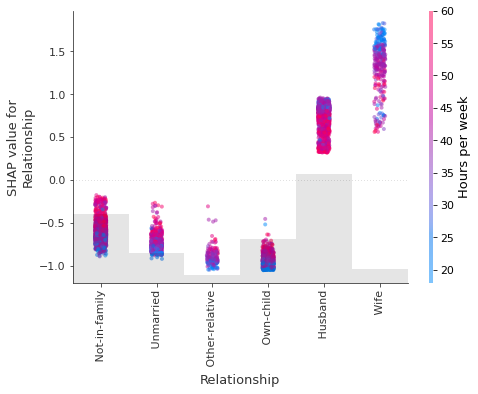

In [15]:
shap.plots.scatter(shap_values[:, 'Relationship'], alpha=0.5, color=shap_values)

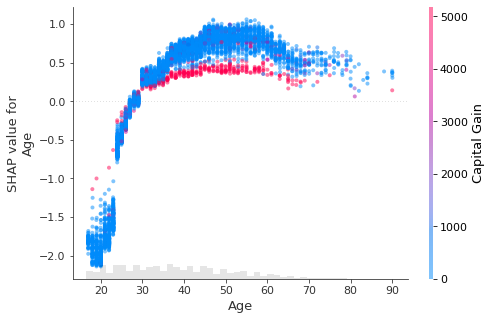

In [16]:
shap.plots.scatter(shap_values[:, 'Age'], alpha=0.5, color=shap_values)

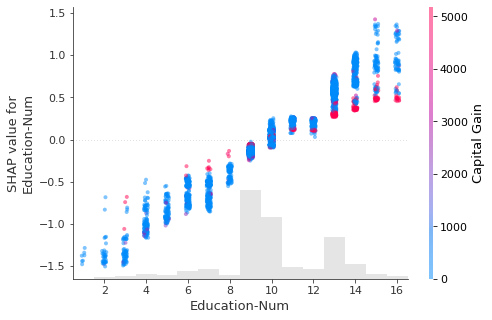

In [17]:
shap.plots.scatter(shap_values[:, 'Education-Num'], alpha=0.5, color=shap_values)

Hours per week is a promising feature for modification. I expect some but not too many differences by deducting 1 of each instances feature value and training a second classifier with this data.

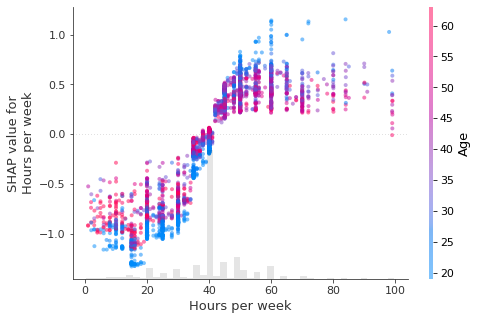

In [18]:
shap.plots.scatter(shap_values[:, 'Hours per week'], alpha=0.5, color=shap_values)

In [20]:
hours_per_week_idx = np.where(feature_names == 'Hours per week')[0][0]
hours_per_week_idx

10

The SHAP values of Country are an order of magnitude lower than the previously investigated features. I expect no additional differences if I set all instances feature values to the value of highest occurence (United-States) and training another classifier on this data set.

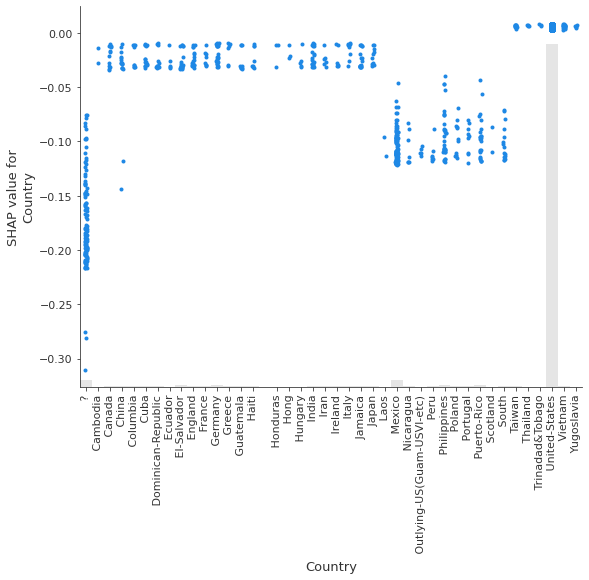

In [32]:
fig, ax = plt.subplots(figsize=(9, 7))
shap.plots.scatter(shap_values[:, 'Country'], ax=ax)

In [21]:
country_idx = np.where(feature_names == 'Country')[0][0]
country_idx

11